# Weekly number 1 songs danceability.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading the Spotify songs and Billboard top 100 songs
songs = pd.read_csv('../data/raw/1/data.csv', usecols=['artists', 'name', 'danceability', 'year'])
top = pd.read_csv('../data/raw/2/kcmillersean-billboard-hot-100-1958-2017/data/hot_stuff_2.csv', usecols=['weekid', 'week_position', 'song', 'performer'])

In [130]:
# Clean up of the top 100 songs list. This list contains duplicates due to multiple weeks at number 1
newtop = top.drop_duplicates(['song', 'performer'], keep = 'last')
newtop = newtop[newtop['week_position'] == 1]
newtop['weekid'] = newtop['weekid'].map(lambda x: int(x[:4]))
newtop = newtop.rename(columns = {'weekid' : 'year', 'week_position' : 'position', 'song' : 'name', 'performer' : 'artists'})

In [132]:
# Merging of the 2 lists using a join. We only want the songs that were number 1 at some point during their release year
combine = pd.merge(left=songs, right=newtop, left_on=['name','year'], right_on=['name','year'])
combine = combine.drop_duplicates(['artists_y', 'name'], keep = 'last')
combine

# Note: These lists need more scrubbing and sanitizing before merging. Clearly merging by artists is needed to properlly
# join the dataframes.

,artists_x,danceability,name,year,position,artists_y
1,"['Frank Sinatra', 'Nancy Sinatra']",0.257,Somethin' Stupid,1967,1,Nancy Sinatra & Frank Sinatra
5,['Elvis Presley'],0.219,Bridge Over Troubled Water,1970,1,Simon & Garfunkel
6,['OutKast'],0.838,Ms. Jackson,2001,1,OutKast
8,['Flo Rida'],0.720,Right Round,2009,1,Flo Rida
10,['Anita Ward'],0.783,Ring My Bell,1979,1,Anita Ward
...,...,...,...,...,...,...
107,['Alan Jackson'],0.590,Someday,1991,1,Mariah Carey
108,['Otis Redding'],0.772,(I Can't Get No) Satisfaction,1965,1,The Rolling Stones
109,['The Temptations'],0.855,Papa Was A Rollin' Stone,1972,1,The Temptations
110,['Richard Marx'],0.572,Satisfied,1989,1,Richard Marx


<AxesSubplot:title={'center':'Dance Dance'}, xlabel='year', ylabel='danceability'>

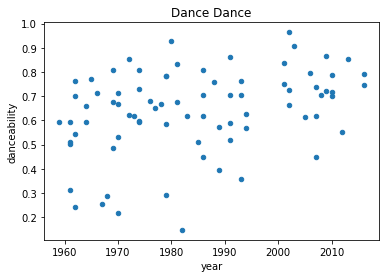

In [131]:
# A simple plot to visualize danceability over the dataset
combine.plot(kind='scatter', x='year', y='danceability', title='Dance Dance')